In [40]:

from xml.etree.ElementTree import PI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import os
import random
import seaborn as sns
import csv
import collections
from keras.preprocessing.image import load_img
from matplotlib.pyplot import figure
from tensorflow.python.client import device_lib
#from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import backend as K
import zipfile
#with zipfile.ZipFile("./petfinder-pawpularity-score/train.zip", 'r') as zip_ref:
    #zip_ref.extractall("./petfinder-pawpularity-score/train")

print(device_lib.list_local_devices())
warnings.filterwarnings('ignore')

mypath = "C:/Users/sager/OneDrive/Desktop/CS5824/Project/Models/cat_dog_classifier/cat_dog_classifier/kagglecatsanddogs_3367a/petfinder-pawpularity-score"
files = [os.path.splitext(filename)[0] for filename in os.listdir(mypath + "/train")]

filetr = open(mypath + "/train.csv")
csvreadertr = csv.reader(filetr)

tr_data = []
for row in csvreadertr:
    tr_data.append((row[0], row[13]))
del tr_data[0]

assert(collections.Counter(list(zip(*tr_data))[0]) == collections.Counter(files))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10889335961304086634
xla_global_id: -1
]


In [41]:
df = pd.DataFrame()
df['images'] = files
df['label'] = list(zip(*tr_data))[1]
df['label'] = df['label'].astype(int)

[61, 44, 4, 52, 14, 41, 21, 42, 48, 25, 30, 17, 25, 38, 31, 46, 80, 29, 22, 26, 39, 54, 22, 26, 27]


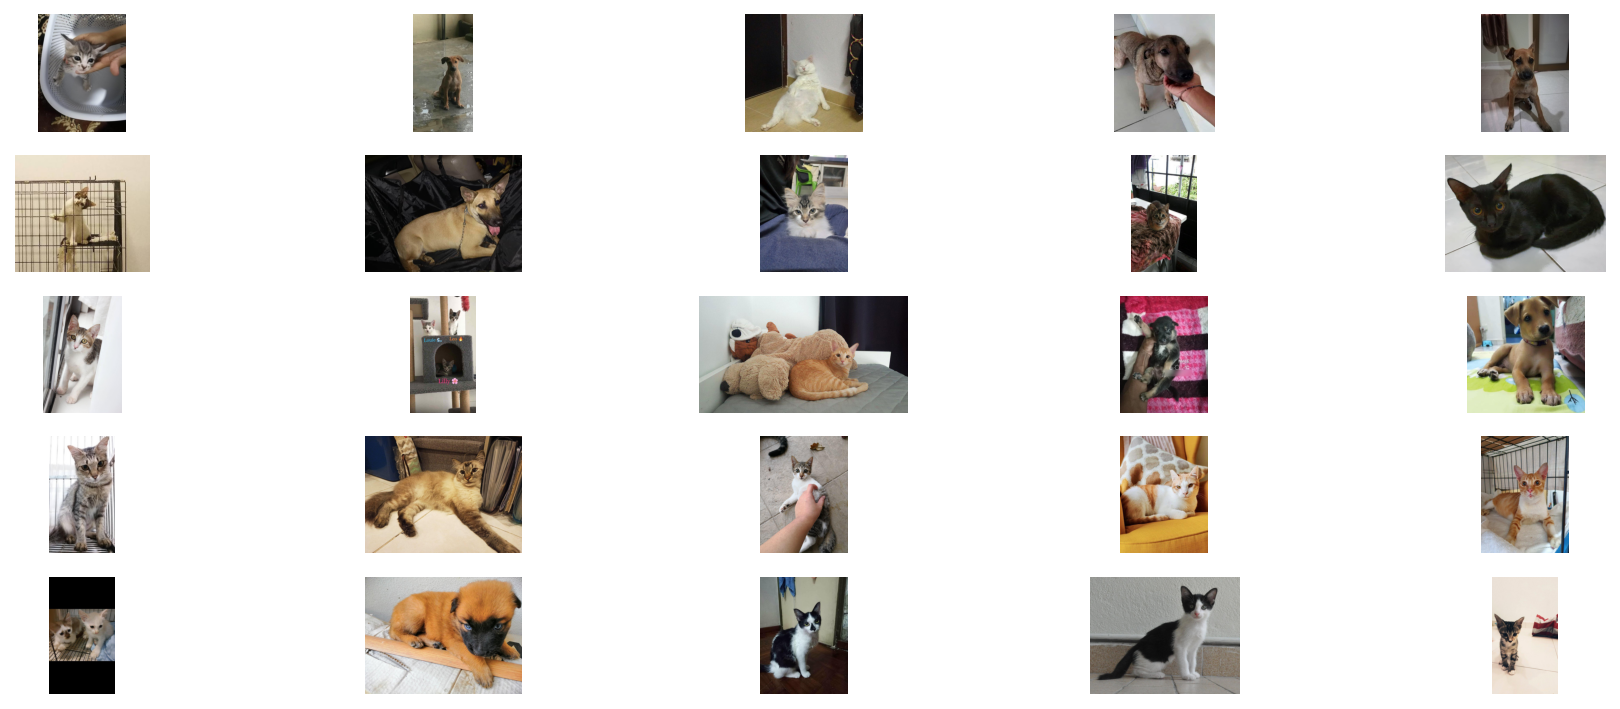

In [42]:
figure(figsize = (15, 6), dpi = 150)

temp = df['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

#TODO: figure out how to put ratings beneath each image
ratings = []
for index,file in enumerate(files):    
    plt.subplot(5,5,index+1)
    img = load_img(mypath + "/train/" + file + ".jpg")
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    ratings.append(np.array(df['label'][df['images'] == file])[0])

print(ratings)

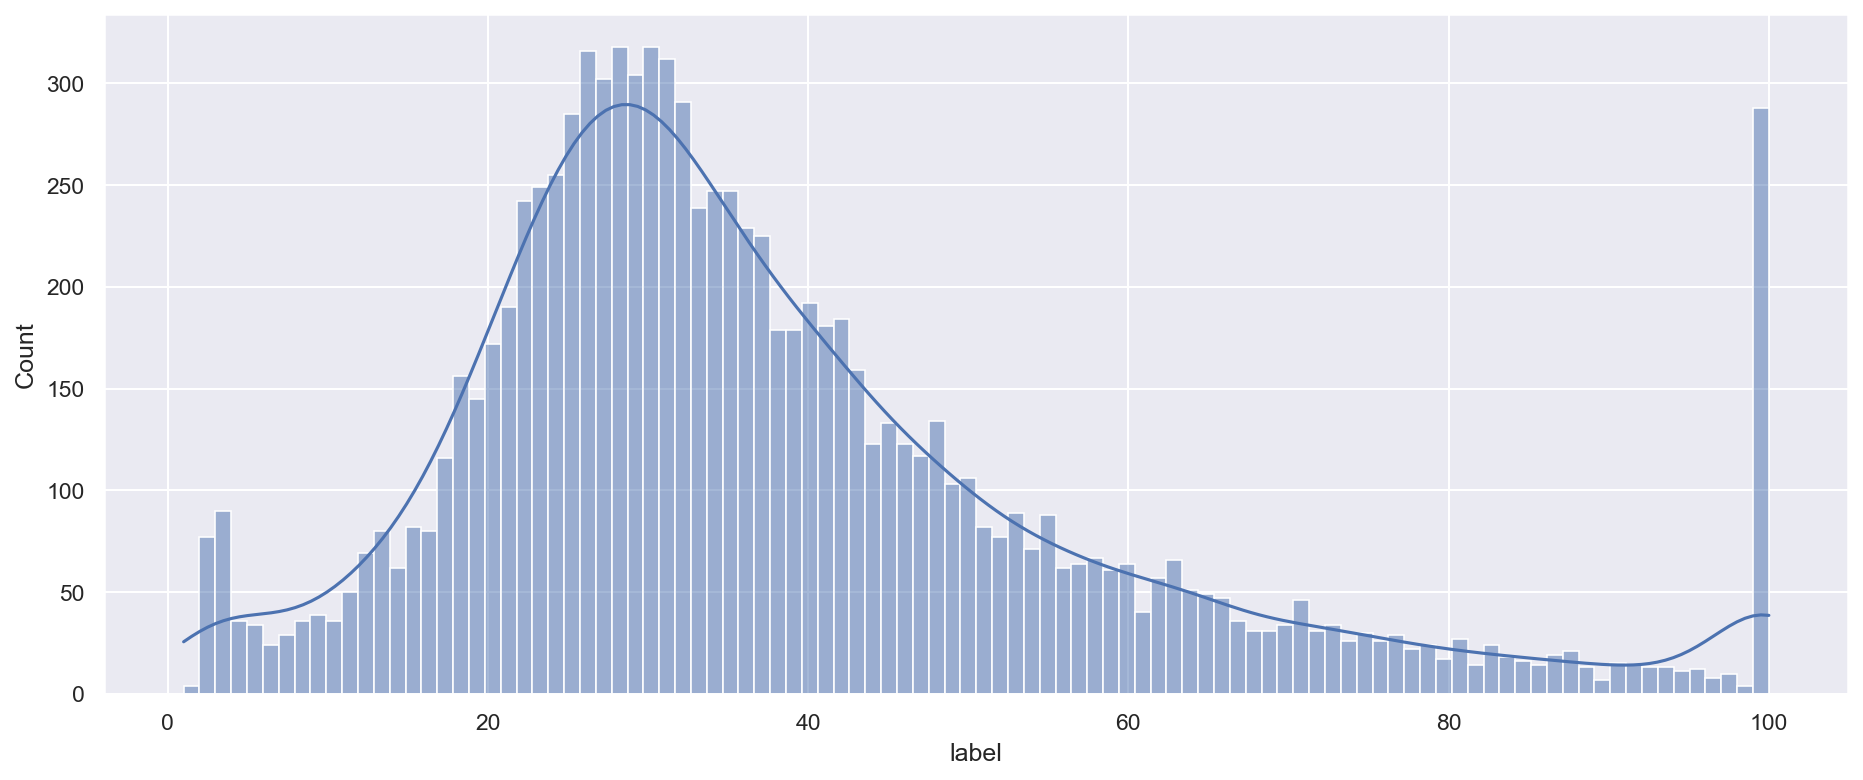

In [43]:
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 100, kde = True)
plt.show()

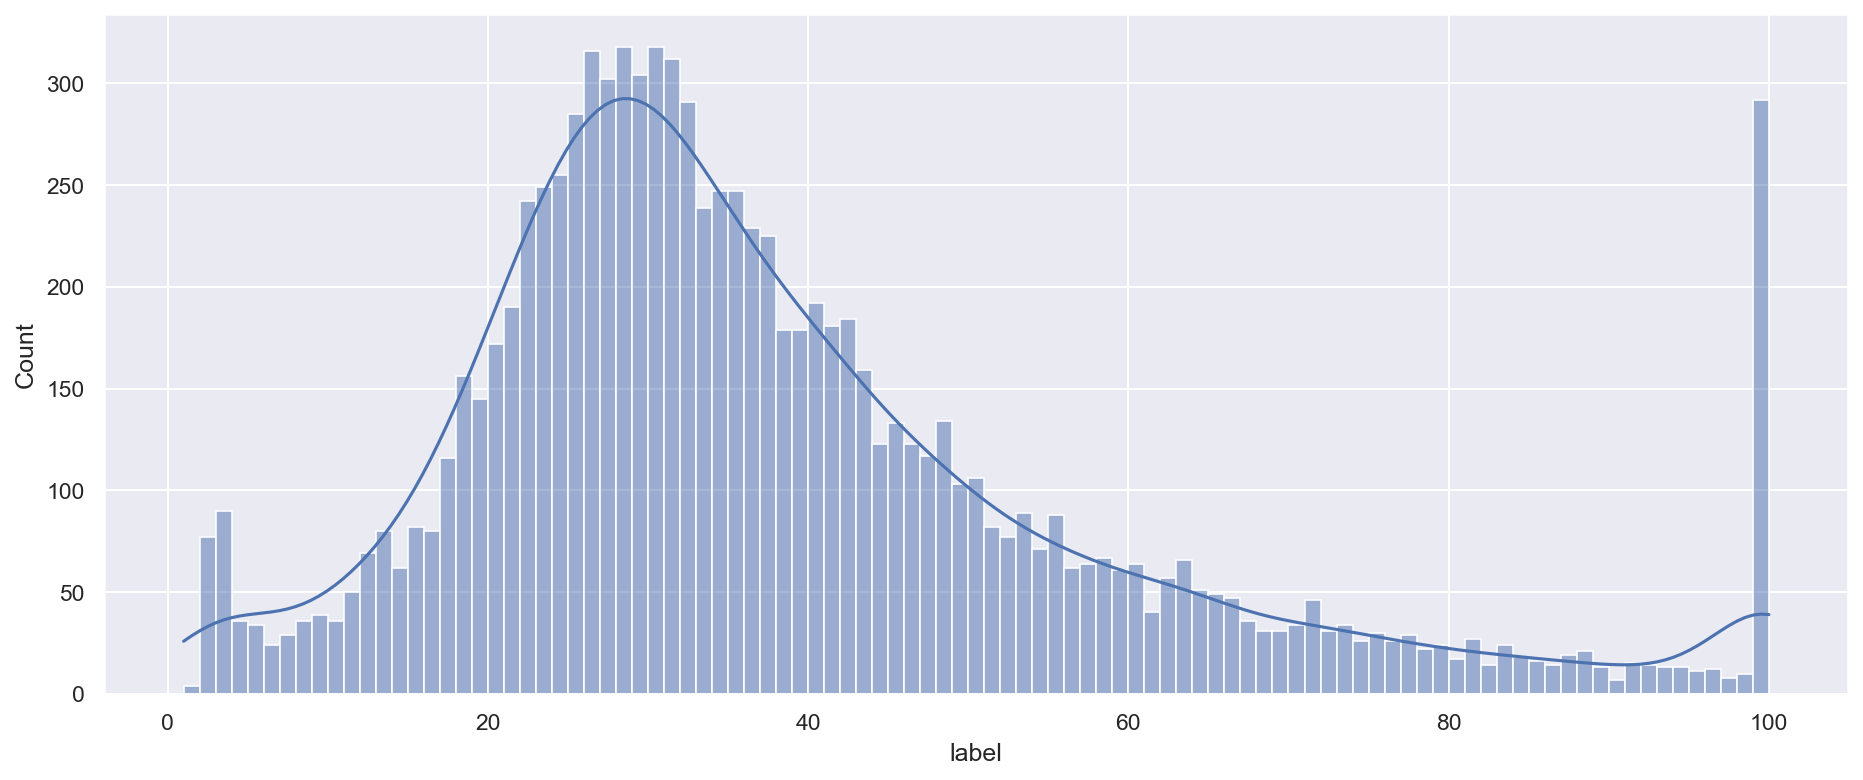

In [44]:
#df = df[(df['label'] < 100)]
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 99, kde = True)
plt.show()

In [45]:
df['images'] = mypath + "/train/" + df['images'] + ".jpg" 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=11)

In [46]:
# Create data generator for the images
# splitting into testing and training data
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, # normalize the image 
    rotation_range = 360, # augmentation of images (helps to avoid overfitting)
    width_shift_range=0.35,
    height_shift_range=0.35,
    shear_range = 0.35,
    zoom_range = 0.35,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
)

val_generator = ImageDataGenerator(rescale=1./255)

# TODO: can't seem to find documentation on what target_size does under hood
# from source code, the 'dataframe' argument is the dataframe of full image paths
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='raw'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='raw'
)

Found 7929 validated image filenames.
Found 1983 validated image filenames.


#print(np.array(train_iterator[123][0]).shape)
#train_iterator[0][1][0][0][0]
testflat = np.array(train_iterator[0][0])
print(testflat.shape)
#print(testflat_f.shape)

counter = 0
stack = None
super = None
for s in train_iterator:    
    testflat = s[0]
    if (counter == 3000):
        break
    for b in testflat:
        #counter = counter + 1
        if (stack is None):
            stack = b.flatten()
        else: stack = np.vstack((stack, b.flatten()))
        print(stack.shape)
    if (super is None):
            super = stack
    else: super = np.vstack((super, stack))
    counter = counter + 1


In [47]:
x_np_array = np.zeros(7929 *128*128*3)
x_np_array = np.reshape(x_np_array, (7929 , 49152))
#print(x_np_array.shape)
#print(x_np_array)

y_np_array = np.zeros(7929 )
y_np_array = np.reshape(y_np_array, (7929 , 1))
print(y_np_array.shape)

(7929, 1)


In [48]:
xv_np_array = np.zeros(1983*128*128*3)
xv_np_array = np.reshape(xv_np_array, (1983, 49152))
#print(x_np_array.shape)
#print(x_np_array)

yv_np_array = np.zeros(1983)
yv_np_array = np.reshape(yv_np_array, (1983, 1))
print(yv_np_array.shape)

(1983, 1)


In [49]:
counter = 0

for s in train_iterator:    
    if counter == 7929 :
        break
    batch = s[0]
    batch_labels = s[1]
    
    #print(batch.shape)
    #print(batch_labels.shape)
    #print(x_np_array.shape)
    cardinality = batch.shape[0]       
    print("batch size: " + str(cardinality))

    for c in range(cardinality):
        print("c: " + str(c))
        x_np_array[counter] = batch[c].flatten()
        y_np_array[counter] = batch_labels[c]             
        print("counter: " + str(counter))
        counter = counter + 1    

#print(y_np_array)

batch size: 64
c: 0
counter: 0
c: 1
counter: 1
c: 2
counter: 2
c: 3
counter: 3
c: 4
counter: 4
c: 5
counter: 5
c: 6
counter: 6
c: 7
counter: 7
c: 8
counter: 8
c: 9
counter: 9
c: 10
counter: 10
c: 11
counter: 11
c: 12
counter: 12
c: 13
counter: 13
c: 14
counter: 14
c: 15
counter: 15
c: 16
counter: 16
c: 17
counter: 17
c: 18
counter: 18
c: 19
counter: 19
c: 20
counter: 20
c: 21
counter: 21
c: 22
counter: 22
c: 23
counter: 23
c: 24
counter: 24
c: 25
counter: 25
c: 26
counter: 26
c: 27
counter: 27
c: 28
counter: 28
c: 29
counter: 29
c: 30
counter: 30
c: 31
counter: 31
c: 32
counter: 32
c: 33
counter: 33
c: 34
counter: 34
c: 35
counter: 35
c: 36
counter: 36
c: 37
counter: 37
c: 38
counter: 38
c: 39
counter: 39
c: 40
counter: 40
c: 41
counter: 41
c: 42
counter: 42
c: 43
counter: 43
c: 44
counter: 44
c: 45
counter: 45
c: 46
counter: 46
c: 47
counter: 47
c: 48
counter: 48
c: 49
counter: 49
c: 50
counter: 50
c: 51
counter: 51
c: 52
counter: 52
c: 53
counter: 53
c: 54
counter: 54
c: 55
counter: 

In [50]:
counter = 0

for s in val_iterator:    
    if counter == 1983:
        break

    batch = s[0]
    batch_labels = s[1]
   
    cardinality = batch.shape[0]       
    print("batch size: " + str(cardinality))

    for c in range(cardinality):
        print("c: " + str(c))
        xv_np_array[counter] = batch[c].flatten()
        yv_np_array[counter] = batch_labels[c]             
        print("counter: " + str(counter))
        counter = counter + 1    

#print(y_np_array)

batch size: 64
c: 0
counter: 0
c: 1
counter: 1
c: 2
counter: 2
c: 3
counter: 3
c: 4
counter: 4
c: 5
counter: 5
c: 6
counter: 6
c: 7
counter: 7
c: 8
counter: 8
c: 9
counter: 9
c: 10
counter: 10
c: 11
counter: 11
c: 12
counter: 12
c: 13
counter: 13
c: 14
counter: 14
c: 15
counter: 15
c: 16
counter: 16
c: 17
counter: 17
c: 18
counter: 18
c: 19
counter: 19
c: 20
counter: 20
c: 21
counter: 21
c: 22
counter: 22
c: 23
counter: 23
c: 24
counter: 24
c: 25
counter: 25
c: 26
counter: 26
c: 27
counter: 27
c: 28
counter: 28
c: 29
counter: 29
c: 30
counter: 30
c: 31
counter: 31
c: 32
counter: 32
c: 33
counter: 33
c: 34
counter: 34
c: 35
counter: 35
c: 36
counter: 36
c: 37
counter: 37
c: 38
counter: 38
c: 39
counter: 39
c: 40
counter: 40
c: 41
counter: 41
c: 42
counter: 42
c: 43
counter: 43
c: 44
counter: 44
c: 45
counter: 45
c: 46
counter: 46
c: 47
counter: 47
c: 48
counter: 48
c: 49
counter: 49
c: 50
counter: 50
c: 51
counter: 51
c: 52
counter: 52
c: 53
counter: 53
c: 54
counter: 54
c: 55
counter: 

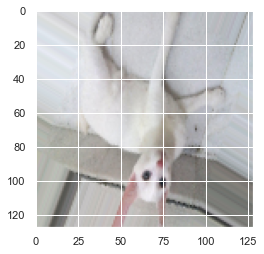

In [51]:
plt.imshow(x_np_array[0].reshape((128, 128, 3)))

In [52]:
from sklearn.svm import SVR
print("foo")
svr_rbf = SVR(kernel='linear', C=0.05, gamma='scale', epsilon=2, tol=0.001)
fit = svr_rbf.fit(x_np_array, y_np_array)
print("bar")

foo
bar


In [53]:
yv = fit.predict(xv_np_array)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(yv_np_array, yv, squared=False)
print(rms)

22.10370681833164



model2 = Sequential([
    Conv2D(64, (7,7), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((3,3)),
    Conv2D(16, (5,5), activation='relu'),
    MaxPool2D((3,3)),
    Conv2D(16, (4,4), activation='relu'),
    Conv2D(16, (2,2), activation='relu'),
    #Conv2D(256, (2,2), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(rate = 0.25),    
    Dense(2048, activation='sigmoid'),    
    Dense(1, activation='linear'),
])

(array([ 88., 190., 568., 512., 279., 125.,  66.,  51.,  28.,  76.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

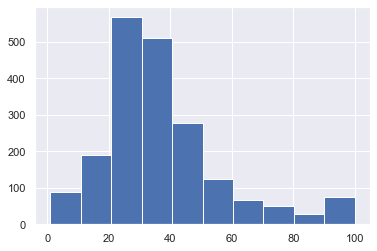

In [54]:
plt.hist(yv_np_array)

(array([  1.,   2.,  25., 137., 475., 771., 428., 119.,  23.,   2.]),
 array([-11.48290961,  -2.99488953,   5.49313055,  13.98115063,
         22.46917071,  30.95719079,  39.44521087,  47.93323095,
         56.42125103,  64.90927111,  73.39729119]),
 <BarContainer object of 10 artists>)

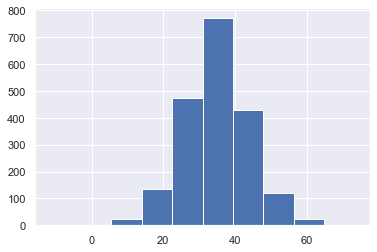

In [55]:
plt.hist(yv)

In [56]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=0.05, gamma='auto', epsilon=2, tol=0.001)
fit = svr_rbf.fit(x_np_array, y_np_array)

In [57]:
yv = fit.predict(xv_np_array)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(yv_np_array, yv, squared=False)
print(rms)

22.10370681833164


(array([ 88., 190., 568., 512., 279., 125.,  66.,  51.,  28.,  76.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

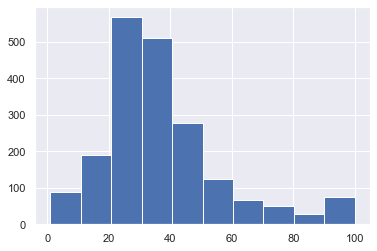

In [58]:
plt.hist(yv_np_array)

(array([  1.,   2.,  25., 137., 475., 771., 428., 119.,  23.,   2.]),
 array([-11.48290961,  -2.99488953,   5.49313055,  13.98115063,
         22.46917071,  30.95719079,  39.44521087,  47.93323095,
         56.42125103,  64.90927111,  73.39729119]),
 <BarContainer object of 10 artists>)

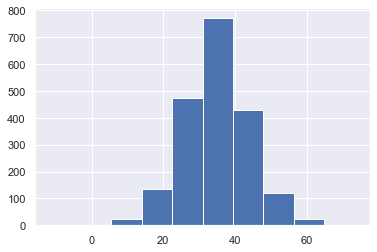

In [59]:
plt.hist(yv)

In [60]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=0.001, gamma='scale', epsilon=5, tol=0.001)
fit = svr_rbf.fit(x_np_array, y_np_array)

In [61]:
yv = fit.predict(xv_np_array)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(yv_np_array, yv, squared=False)
print(rms)

20.331710311792417


(array([ 88., 190., 568., 512., 279., 125.,  66.,  51.,  28.,  76.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

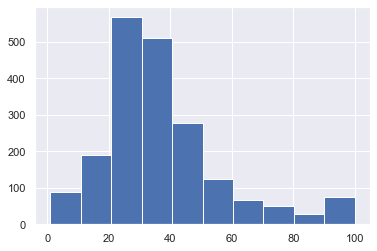

In [62]:
plt.hist(yv_np_array)

(array([  3.,  12., 101., 278., 493., 546., 365., 139.,  38.,   8.]),
 array([27.12952469, 28.49888608, 29.86824747, 31.23760886, 32.60697025,
        33.97633164, 35.34569302, 36.71505441, 38.0844158 , 39.45377719,
        40.82313858]),
 <BarContainer object of 10 artists>)

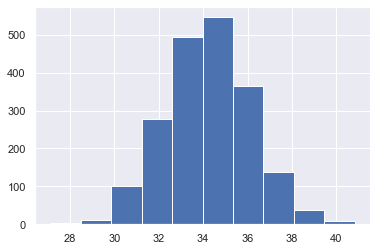

In [63]:
plt.hist(yv)

In [64]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=0.07, gamma='scale', epsilon=2, tol=0.001)
fit = svr_rbf.fit(x_np_array, y_np_array)

In [ ]:
yv = fit.predict(xv_np_array)

In [ ]:
plt.hist(yv_np_array)

In [ ]:
plt.hist(yv)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=0.07, gamma='auto', epsilon=2, tol=0.001)
fit = svr_rbf.fit(x_np_array, y_np_array)

In [ ]:
yv = fit.predict(xv_np_array)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(yv_np_array, yv, squared=False)
print(rms)

In [ ]:
plt.hist(yv_np_array)

In [ ]:
plt.hist(yv)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=0.01, gamma='scale', epsilon=1, tol=0.001)
fit = svr_rbf.fit(x_np_array, y_np_array)

In [ ]:
yv = fit.predict(xv_np_array)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(yv_np_array, yv, squared=False)
print(rms)

In [ ]:
plt.hist(yv_np_array)

In [ ]:
plt.hist(yv)